In [1]:
import pandas as pd

# Load customer and transaction data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge transaction data with customer data on CustomerID
customer_transactions = transactions_df.merge(customers_df, on='CustomerID')

# Aggregate transaction data to create customer profiles
customer_profiles = customer_transactions.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_spent=('TotalValue', 'sum'),
    unique_products=('ProductID', 'nunique')
).reset_index()

# Display the first few rows of the customer profile data
print(customer_profiles.head())


  CustomerID  total_transactions  total_spent  unique_products
0      C0001                   5      3354.52                5
1      C0002                   4      1862.74                4
2      C0003                   4      2725.38                4
3      C0004                   8      5354.88                8
4      C0005                   3      2034.24                3


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
customer_profiles[['total_transactions', 'total_spent', 'unique_products']] = scaler.fit_transform(
    customer_profiles[['total_transactions', 'total_spent', 'unique_products']]
)


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Perform KMeans clustering (choose number of clusters between 2 and 10)
kmeans = KMeans(n_clusters=5, random_state=42)  # You can experiment with different cluster numbers
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles[['total_transactions', 'total_spent', 'unique_products']])

# Display the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_profiles[['total_transactions', 'total_spent', 'unique_products']], customer_profiles['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Cluster Centers:
 [[ 1.92669458  1.90102476  1.94704912]
 [-0.68391798 -0.67060379 -0.68946293]
 [ 0.12342568  0.21064498  0.15691993]
 [ 1.19197     0.86740969  1.13028412]
 [-1.640158   -1.40139124 -1.64370574]]
Davies-Bouldin Index: 0.9245800474301245


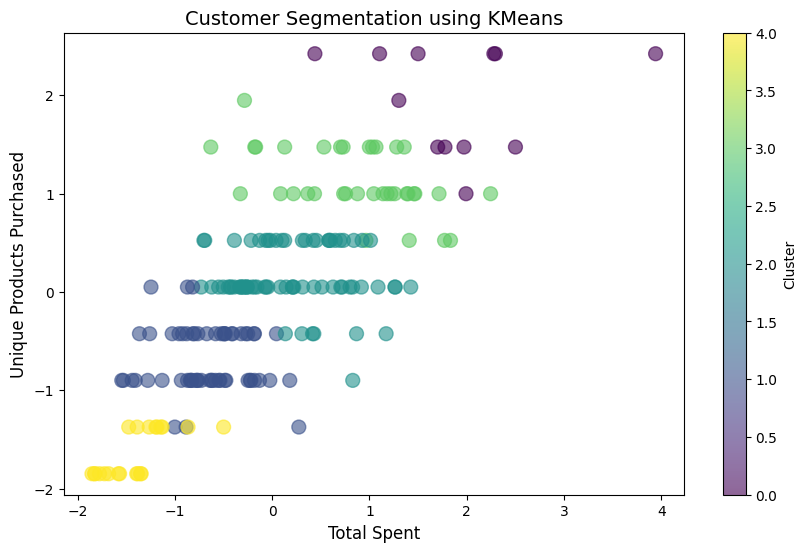

In [4]:
# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_profiles['total_spent'], customer_profiles['unique_products'], c=customer_profiles['Cluster'], cmap='viridis', s=100, alpha=0.6)

plt.title('Customer Segmentation using KMeans', fontsize=14)
plt.xlabel('Total Spent', fontsize=12)
plt.ylabel('Unique Products Purchased', fontsize=12)
plt.colorbar(label='Cluster')
plt.show()


In [5]:
# Save the clustering results to a CSV file
customer_profiles[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)

